In [1]:
import MySQLdb

db = MySQLdb.connect("127.0.0.1","root","tp6cj84jo","ptt", charset="utf8")
cursor = db.cursor()
cursor.execute("SELECT post_name, ptime, reply \
                FROM User_save_post, Gossiping, Gossiping_Reply \
                WHERE class_id='%s' and user_id='%s' \
                    AND Gossiping.pid=User_save_post.pid \
                    AND Gossiping_Reply.pid=Gossiping.pid \
                ORDER BY ptime;" % ('25255dsdsds', 1))
data = cursor.fetchall()
db.close()


In [2]:
pos_list = []
neg_list = []

with open("./sentiment_dicts/ntusd-positive.txt", 'r') as f:
    pos_list = f.read().split('\n')
with open("./sentiment_dicts/ntusd-negative.txt", 'r') as f:
    neg_list = f.read().split('\n')

def json_str_parser(data):    
    reply = []
    reply_raw = data
    tmp = reply_raw[2:-2].split('}, {')
    for i, w in enumerate(tmp):
        reply.append([
            w[w.index(""""push_tag": """) + len("""\"push_tag": \""""):w.index("""\", "push_date\":""")],
            w[w.index(""", "push_user": """) + len(""", \"push_user\": \""""):w.index("""\", "push_content": \"""")],
            w[w.index("""push_content\": \":""") + len("""push_content": ":"""):],
            w[w.index(""", "push_date": """) + len(""", \"push_date\": \""""):w.index("\n")]
            ])
    return reply

def cal_content_weight(reply):
    pos_reply, neg_reply, all_reply = 0, 0, 0
    for tag, user, content, ip_and_time in reply:
        if '推' in tag:
            pos_reply += 1
        elif '噓' in tag:
            neg_reply += 1
        all_reply += 1
    pos_weight, neg_weight = pos_reply / all_reply, neg_reply / all_reply
    return pos_weight, neg_weight

In [3]:
pos_day_result = []
neg_day_result = []
day = []
for i in data:
    day.append(i[1])
    reply = json_str_parser(i[2])
    pos_score, neg_score = 0, 0
    combine_all_reply_string = "".join([w[2] for w in reply])
    reply_count = len(reply)
    for pos in pos_list:
        pos_score += combine_all_reply_string.count(pos)
    for neg in neg_list:
        neg_score += combine_all_reply_string.count(neg)
    pos_weight, neg_weight = cal_content_weight(reply)
    pos_day_result.append(pos_weight*pos_score)
    neg_day_result.append(neg_weight*neg_score)

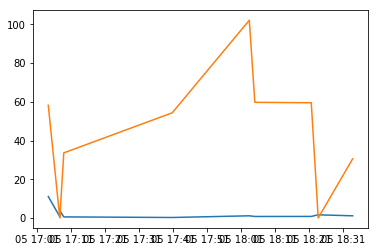

In [5]:
from matplotlib import pyplot as plt
plt.plot(day, pos_day_result)
plt.plot(day, neg_day_result)
plt.show()